# 1. Import and Install Dependencies

In [1]:
# !pip install protobuf==3.19.6 mediapipe==0.8.10

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic Model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color conversion RGB 2 BGR
    return image, results

In [4]:
# draw different connections 
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

In [5]:
# draw different colored connections 
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Reed feed
        ret, frame = cap.read()
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [8]:
len(results.right_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame,results)

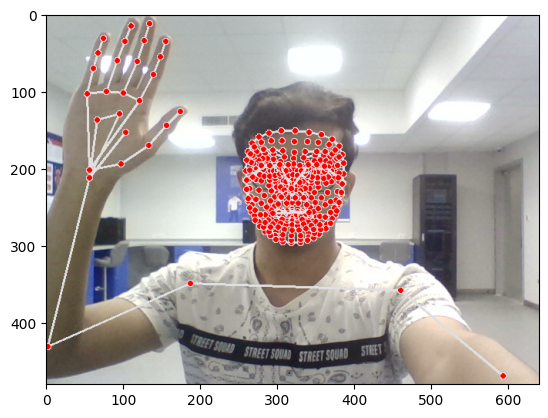

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
results.pose_landmarks

landmark {
  x: 0.4971804618835449
  y: 0.4721703827381134
  z: -1.072115421295166
  visibility: 0.9999212026596069
}
landmark {
  x: 0.5327041745185852
  y: 0.4068918228149414
  z: -1.008872628211975
  visibility: 0.999733567237854
}
landmark {
  x: 0.5490617156028748
  y: 0.40828800201416016
  z: -1.0089786052703857
  visibility: 0.9995965957641602
}
landmark {
  x: 0.5646196007728577
  y: 0.41120675206184387
  z: -1.0089516639709473
  visibility: 0.9995819926261902
}
landmark {
  x: 0.4736945629119873
  y: 0.40792474150657654
  z: -1.0043251514434814
  visibility: 0.999814510345459
}
landmark {
  x: 0.45368704199790955
  y: 0.40857383608818054
  z: -1.0042670965194702
  visibility: 0.9997891783714294
}
landmark {
  x: 0.43625086545944214
  y: 0.40946394205093384
  z: -1.0044963359832764
  visibility: 0.999852180480957
}
landmark {
  x: 0.5935525894165039
  y: 0.44246354699134827
  z: -0.5944627523422241
  visibility: 0.9995216727256775
}
landmark {
  x: 0.419796884059906
  y: 0.4399

In [13]:
len(results.right_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
len(pose)

33

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])

In [17]:
pose.shape

(33, 4)

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [19]:
pose.shape

(132,)

In [20]:
# Error handling if pose is not visible in frame, create a np.zeros array of definite shape
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [21]:
face = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
face

array([ 0.49718046,  0.47217038, -1.07211542,  0.53270417,  0.40689182,
       -1.00887263,  0.54906172,  0.408288  , -1.00897861,  0.5646196 ,
        0.41120675, -1.00895166,  0.47369456,  0.40792474, -1.00432515,
        0.45368704,  0.40857384, -1.0042671 ,  0.43625087,  0.40946394,
       -1.00449634,  0.59355259,  0.44246355, -0.59446275,  0.41979688,
        0.43998209, -0.55802989,  0.53437251,  0.53635901, -0.92187053,
        0.46001634,  0.53847021, -0.91335601,  0.7201041 ,  0.74701256,
       -0.32878551,  0.29235053,  0.72762477, -0.27234542,  0.92797029,
        0.97879571, -0.31133175,  0.00445259,  0.89830077, -0.72318989,
        1.12759709,  1.3107419 , -0.60417819,  0.08823913,  0.4429895 ,
       -1.3778547 ,  1.19409096,  1.3962152 , -0.67741627,  0.10428487,
        0.28574759, -1.53447175,  1.16304278,  1.3883034 , -0.74868953,
        0.1489183 ,  0.26992241, -1.43350923,  1.12544727,  1.37354159,
       -0.65494621,  0.16106558,  0.31881979, -1.36704779,  0.63

In [22]:
lh = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
rh = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
rh

array([ 0.49718046,  0.47217038, -1.07211542,  0.53270417,  0.40689182,
       -1.00887263,  0.54906172,  0.408288  , -1.00897861,  0.5646196 ,
        0.41120675, -1.00895166,  0.47369456,  0.40792474, -1.00432515,
        0.45368704,  0.40857384, -1.0042671 ,  0.43625087,  0.40946394,
       -1.00449634,  0.59355259,  0.44246355, -0.59446275,  0.41979688,
        0.43998209, -0.55802989,  0.53437251,  0.53635901, -0.92187053,
        0.46001634,  0.53847021, -0.91335601,  0.7201041 ,  0.74701256,
       -0.32878551,  0.29235053,  0.72762477, -0.27234542,  0.92797029,
        0.97879571, -0.31133175,  0.00445259,  0.89830077, -0.72318989,
        1.12759709,  1.3107419 , -0.60417819,  0.08823913,  0.4429895 ,
       -1.3778547 ,  1.19409096,  1.3962152 , -0.67741627,  0.10428487,
        0.28574759, -1.53447175,  1.16304278,  1.3883034 , -0.74868953,
        0.1489183 ,  0.26992241, -1.43350923,  1.12544727,  1.37354159,
       -0.65494621,  0.16106558,  0.31881979, -1.36704779,  0.63

In [39]:

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
extract_keypoints(results).shape

(1662,)

In [26]:
468*3+33*4+21*3+21*3

1662

In [27]:
result_test = extract_keypoints(results)

In [28]:
result_test

array([ 0.49718046,  0.47217038, -1.07211542, ...,  0.11706106,
        0.0661497 , -0.03285636])

In [29]:
np.save('0',result_test)

In [30]:
np.load('0.npy')

array([ 0.49718046,  0.47217038, -1.07211542, ...,  0.11706106,
        0.0661497 , -0.03285636])

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays (key points)
Data_Path = os.path.join('MP_data')

# Action that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 videos worth of data 
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30 

In [32]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(Data_Path, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length\
            for frame_num in range(sequence_length):
                
                # Reed feed
                ret, frame = cap.read()
                
                # Make Detections
                image, results = mediapipe_detection(frame, holistic)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic 
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collectiing frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collectiing frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(Data_Path, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                #Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(Data_Path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape

(90, 30, 1662)

In [13]:
np.array(labels).shape

(90,)

In [14]:
X = np.array(sequences)

In [15]:
X.shape

(90, 30, 1662)

In [16]:
y = to_categorical(labels).astype('int')

In [17]:
y.shape

(90, 3)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [19]:
y_train.shape

(85, 3)

# 7. Build and Train LSTM Neural Network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
# Open CMD, go to specific logs/train directory and type tensorboard --logdir=.

In [22]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30,1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [23]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 369ms/step - loss: 1.2639 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 1s 377ms/step - loss: 5.8147 - categorical_accuracy: 0.2941
Epoch 3/2000
3/3 [==============================] - 1s 346ms/step - loss: 1.4884 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 1s 349ms/step - loss: 1.6663 - categorical_accuracy: 0.3882
Epoch 5/2000
3/3 [==============================] - 1s 364ms/step - loss: 1.1631 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 1s 364ms/step - loss: 0.9993 - categorical_accuracy: 0.4941
Epoch 7/2000
3/3 [==============================] - 1s 375ms/step - loss: 0.8759 - categorical_accuracy: 0.5882
Epoch 8/2000
3/3 [==============================] - 1s 351ms/step - loss: 0.7529 - categorical_accuracy: 0.6706
Epoch 9/2000
3/3 [==============================] - 1s 376ms/step - loss: 0.6330 - categorical_accuracy:

KeyboardInterrupt: 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [26]:
res = model.predict(X_test)

1/1 [==============================] - 0s 398ms/step


In [27]:
actions[np.argmax(res[3])]

'iloveyou'

In [28]:
actions[np.argmax(y_test[3])]

'hello'

# 9. Save Weights

In [29]:
model.save('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [30]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [31]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 77ms/step


In [32]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [33]:
ytrue

[2, 2, 2, 0, 2]

In [34]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[0, 1],
        [0, 4]]], dtype=int64)

In [35]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [36]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_fram, colors):
    output_frame = input_fram.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

In [37]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [41]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        
        # Reed feed
        ret, frame = cap.read()
        
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction Logic
        keypoints = extract_keypoints(results)
        # sequence.insert(0,keypoints)
        # sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        
        # 3. Visualization Logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            
            if len(sentence) > 5:
                sentence = sentence[-5:]
    
            # Vizualize probabilities
            image = prob_viz(res, actions, image, colors)
        
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()